In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
ds = pd.read_csv("loan.csv")
ds.head(3)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y


In [3]:
ds.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

C:\Users\masoo\AppData\Local\Temp\ipykernel_14356\4251208349.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(ds["CoapplicantIncome"])


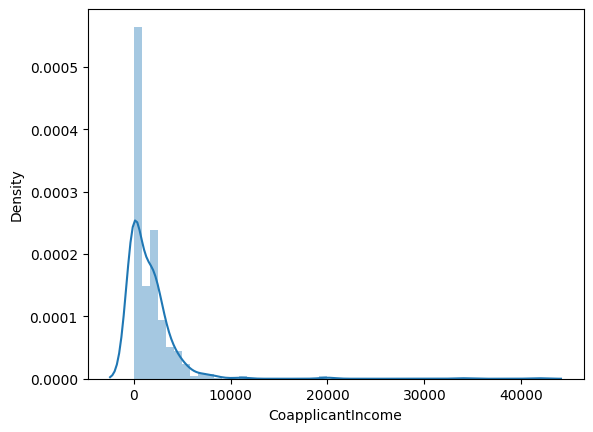

In [4]:
sns.distplot(ds["CoapplicantIncome"])
plt.show()

In [5]:
q1 = ds["CoapplicantIncome"].quantile(0.25)
q3 = ds["CoapplicantIncome"].quantile(0.75)

In [6]:
IQR = q3 - q1

In [7]:
min_r = q1 - (1.5*IQR)
max_r = q3 + (1.5*IQR)
min_r,max_r

(np.float64(-3445.875), np.float64(5743.125))

In [8]:
ds = ds[ds["CoapplicantIncome"]<=max_r]

C:\Users\masoo\AppData\Local\Temp\ipykernel_14356\4251208349.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(ds["CoapplicantIncome"])


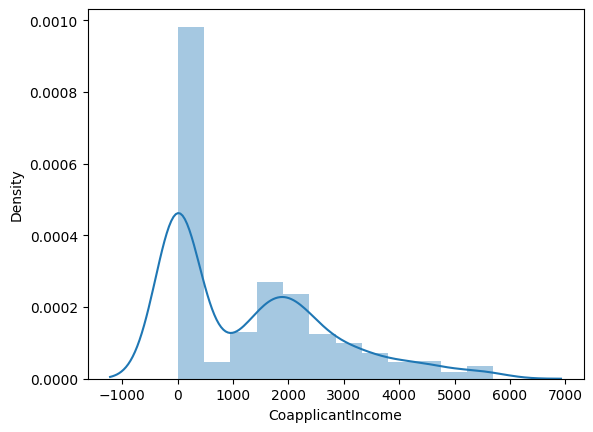

In [9]:
sns.distplot(ds["CoapplicantIncome"])
plt.show()

In [10]:
from sklearn.preprocessing import FunctionTransformer

In [11]:
ft = FunctionTransformer(func=np.log1p)
ft.fit(ds[["CoapplicantIncome"]])

,func,<ufunc 'log1p'>
,inverse_func,None
,validate,False
,accept_sparse,False
,check_inverse,True
,feature_names_out,None
,kw_args,None
,inv_kw_args,None


In [12]:
ds["CoapplicantIncome_tf"] = ft.transform(ds[["CoapplicantIncome"]])
# ds.loc[:, "CoapplicantIncome_tf"] = ft.transform(ds[["CoapplicantIncome"]])


C:\Users\masoo\AppData\Local\Temp\ipykernel_14356\4003846968.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(ds["CoapplicantIncome"])
C:\Users\masoo\AppData\Local\Temp\ipykernel_14356\4003846968.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(ds["CoapplicantIncome_tf"])


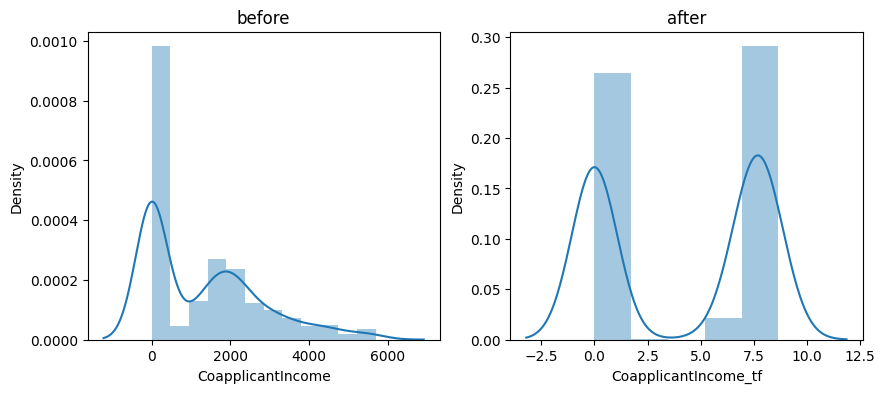

In [14]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.title("before")
sns.distplot(ds["CoapplicantIncome"])

plt.subplot(1,2,2)
plt.title("after")
sns.distplot(ds["CoapplicantIncome_tf"])
plt.show()